#Bài 1:
#<b> Lý An - 19DH110830
## Môn: học máy
### GVHD: Lê Thành Sách

##1.Thông tin dữ liệu
---
###Mô tả



*   Bộ dữ liệu bao gồm 1728 mẫu từ Car Evaluation trong class evaluate (unacc, acc, good, v-good).

###Dữ liệu vào:

* buying(v-high, high, med, low): giá bán
* maint(v-high, high, med, low): phí bảo trì
* doors(2, 3, 4, 5-more): số cửa ra vào
* persons(2, 4, more): số người có thể chứa
* lug_boot(small, med, big): độ rộng khoang chứa hành lí
* safety(low, med, high): mức độ an toàn khi vận hành

Kết quả: evaluate(unacc, acc, good, v-good): đánh giá từ người dùng

##Nguồn dữ liệu:
https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

###2. Khai báo và chuẩn hóa dữ liệu

In [ ]:
import os
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.decomposition import PCA

# algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
!pip install PipelineHelper
from pipelinehelper import PipelineHelper
from sklearn.neural_network import MLPClassifier

import sklearn
# metrics
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report

import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [ ]:
#Đọc dữ liệu
url = "/content/car_evaluation.csv"
names = ['buying',
         'maint',
         'doors',
         'persons',
         'lug_boot',
         'safety',
         'evaluate']
ds = pd.read_csv(url, names=names)

In [ ]:
# shape
print(f'+ Shape: {ds.shape}')
# types
print(f'+ Data Types: \n{ds.dtypes}')
# head, tail
print(f'+ Contents: ')
display.display(ds.head(5))
display.display(ds.tail(5))
# info
ds.info()

+ Shape: (1728, 7)
+ Data Types: 
buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
evaluate    object
dtype: object
+ Contents: 


,buying,maint,doors,persons,lug_boot,safety,evaluate
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


,buying,maint,doors,persons,lug_boot,safety,evaluate
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   evaluate  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
ds.describe()

,buying,maint,doors,persons,lug_boot,safety,evaluate
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [ ]:
#Kiểm tra
has_null = ds.isnull().sum().any()
has_nan  = ds.isna().sum().any()
n_duplicated = ds.duplicated().sum()
ds.replace("?", np.nan, inplace = True)
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(ds[ds.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(ds[ds.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')
if n_duplicated>0:
    display.display(ds[ds.duplicated()])

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False
+ Số dòng trùng: 0


In [ ]:
ds["evaluate"].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: evaluate, dtype: int64

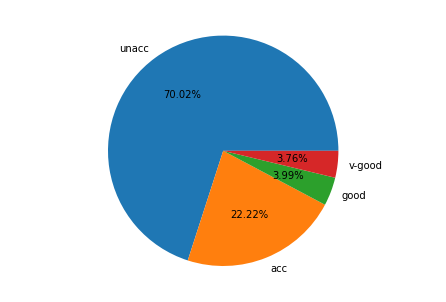

In [ ]:
#Tỷ lệ % dữ liệu của các nhãn
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['unacc','acc','good','v-good']
num = [1210,384,69,65]
ax.pie(num, labels = langs,autopct='%1.2f%%')
plt.show()  

###Nhận xét:
Trong class attribute:
+ unacceptable chiếm 70.02%
+ acceptable chiếm 22.22%
+ good chiếm 3.99%
+ v-good chiếm 3.76%

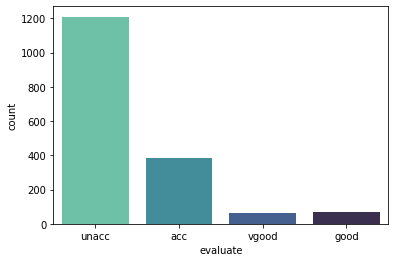

In [ ]:
sns.countplot(x='evaluate', data=ds, palette="mako_r")
plt.xlabel("evaluate")
plt.show()

In [ ]:
ds=ds.replace(to_replace='low',value=0)
ds=ds.replace(to_replace='med',value=1)
ds=ds.replace(to_replace='high',value=2)
ds=ds.replace(to_replace='vhigh',value=3)
ds=ds.replace(to_replace='small',value=0)
ds=ds.replace(to_replace='big',value=2)
ds['doors']=ds['doors'].replace(to_replace='2',value=0)
ds['doors']=ds['doors'].replace(to_replace='3',value=1)
ds['doors']=ds['doors'].replace(to_replace='4',value=2)
ds['doors']=ds['doors'].replace(to_replace='5more',value=3)
ds['persons']=ds['persons'].replace(to_replace='2',value=0)
ds['persons']=ds['persons'].replace(to_replace='4',value=1)
ds['persons']=ds['persons'].replace(to_replace='more',value=2)
ds['evaluate']=ds['evaluate'].replace(to_replace='unacc',value=0)
ds['evaluate']=ds['evaluate'].replace(to_replace='acc',value=1)
ds['evaluate']=ds['evaluate'].replace(to_replace='good',value=2)
ds['evaluate']=ds['evaluate'].replace(to_replace='vgood',value=3)
ds

,buying,maint,doors,persons,lug_boot,safety,evaluate
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
2,3,3,0,0,0,2,0
3,3,3,0,0,1,0,0
4,3,3,0,0,1,1,0
...,...,...,...,...,...,...,...
1723,0,0,3,2,1,1,2
1724,0,0,3,2,1,2,3
1725,0,0,3,2,2,0,0
1726,0,0,3,2,2,1,2


###Nhận xét: thay đổi kiểu dữ liệu string sang numberic
+ buying:
  + low -> 0
  + med -> 1
  + high -> 2
  + vhigh -> 3
+ maint:
  + low -> 0
  + med -> 1
  + high -> 2
  + vhigh -> 3
+ doors:
  + 2 -> 0
  + 3 -> 1
  + 4 -> 2
  + 5more -> 3
+ persons:
  + 2 -> 0
  + 4 -> 1
  + more -> 2
+ lug_boot:
  + small -> 0
  + med -> 1
  + big -> 2
+ safety:
  + low -> 0
  + med -> 1
  + high -> 2
+ evaluate: 
  + unacc -> 0
  + acc -> 1
  + good -> 2
  + vgood -> 3

In [ ]:
import plotly.graph_objects as go
for i in ds.columns:
    labels = ds[i].unique()
    values = ds[i].value_counts()
    fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
    fig.update_layout(title=go.layout.Title(text='Value distribution for column: "{}"'.format(i),x=.5))
    fig.show()

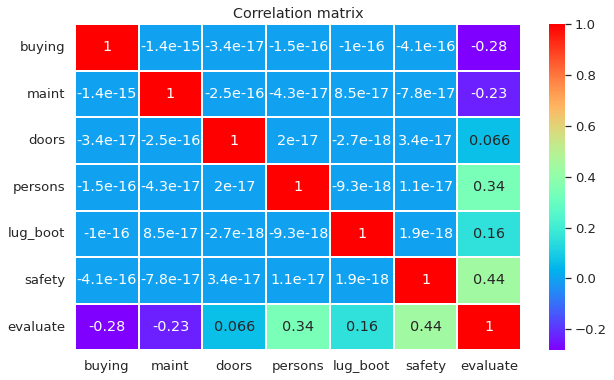

In [ ]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2)
sns.heatmap(ds.corr(),annot=True, cmap='rainbow',linewidth=1)
plt.title('Correlation matrix');

###Nhận xét:
  + evaluate & doors có độ tương quan: 0.066
  + evaluate & persons có độ tương quan: 0.34
  + evaluate & lug_boot có độ tương quan: 0.16
  + evaluate & safety có độ tương quan: 0.44

In [ ]:
df=ds.copy()

In [ ]:
df_clean = df.drop("evaluate", axis = 1)

In [ ]:
X = df_clean
y = df['evaluate']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

###3. Chia tập dữ liệu

In [ ]:
X, y = df.values[:, :-1], df.values[:, -1]
kichthuoc = X.shape, y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
print("Tập dữ liệu:")
print("Tên các lớp: ",langs)
print("Kích thước toàn bộ dữ liệu:", kichthuoc)
print("Kích thước tập huấn luyện, kiểm tra:", X_train.shape, X_test.shape)

Tập dữ liệu:
Tên các lớp:  ['unacc', 'acc', 'good', 'v-good']
Kích thước toàn bộ dữ liệu: ((1728, 6), (1728,))
Kích thước tập huấn luyện, kiểm tra: (1209, 6) (519, 6)


In [ ]:
steps = [
         ('scaler', MinMaxScaler()),
         ('pca',PCA()),
         ('clf',MLPClassifier())
         
]
classifier = Pipeline(steps)
classifier.fit(X, y)
classifier.fit(X_train, y_train)

# Dự báo cho dữ liệu trong tập "kiểm tra" 
y_pred = classifier.predict(X_test)

# In bảng đánh giá
print("-"*80)
print("Bảng đánh giá:")
print(classification_report(y_test, y_pred, target_names=langs))

--------------------------------------------------------------------------------
Bảng đánh giá:
              precision    recall  f1-score   support

       unacc       0.99      0.97      0.98       362
         acc       0.88      0.91      0.90       114
        good       0.76      0.86      0.81        22
      v-good       0.95      0.90      0.93        21

    accuracy                           0.95       519
   macro avg       0.89      0.91      0.90       519
weighted avg       0.95      0.95      0.95       519



**Nhận xét**:
* Quá trình xử lý gồm nhiều bước, cần phải tính dữ liệu trung gian và lưu lại trong các biến riêng. Do đó, mã nguồn dài dòng, và đặc biệt là gây khó khăn để lựa chọn tham số trong từng bước

In [ ]:
pipeline = Pipeline(steps)

# Các cấu hình thử nghiệm
parameters = {
      'scaler__feature_range':[(0,1), (-1,1)],
      'clf__hidden_layer_sizes':[(50,), (100,)],
      'clf__activation':['relu', 'logistic'],
      'clf__max_iter':[1000,],
    }

# Lựa chọn cấu hình tốt nhất
grid = GridSearchCV(pipeline, param_grid=parameters, cv=5, scoring='accuracy', verbose=1)
print(grid.get_params().keys())
grid.fit(X_train, y_train)

print("-"*80)
print("Cấu hình tốt nhất: ", grid.best_params_)
print("Độ chính xác: {:6.2f}".format(grid.score(X_test, y_test)))

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__scaler', 'estimator__pca', 'estimator__clf', 'estimator__scaler__clip', 'estimator__scaler__copy', 'estimator__scaler__feature_range', 'estimator__pca__copy', 'estimator__pca__iterated_power', 'estimator__pca__n_components', 'estimator__pca__random_state', 'estimator__pca__svd_solver', 'estimator__pca__tol', 'estimator__pca__whiten', 'estimator__clf__activation', 'estimator__clf__alpha', 'estimator__clf__batch_size', 'estimator__clf__beta_1', 'estimator__clf__beta_2', 'estimator__clf__early_stopping', 'estimator__clf__epsilon', 'estimator__clf__hidden_layer_sizes', 'estimator__clf__learning_rate', 'estimator__clf__learning_rate_init', 'estimator__clf__max_fun', 'estimator__clf__max_iter', 'estimator__clf__momentum', 'estimator__clf__n_iter_no_change', 'estimator__clf__nesterovs_momentum', 'estimator__clf__power_t', 'estimator__clf__random_state', 'estimator__clf__shuffle', 'estima

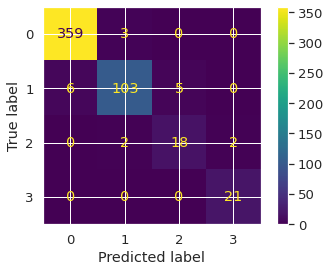

In [ ]:
clf = MLPClassifier(max_iter=1000,activation="relu",random_state=100)
clf.fit(X_train, y_train)
MLPClassifier(max_iter=1000,activation="relu",random_state=100)
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

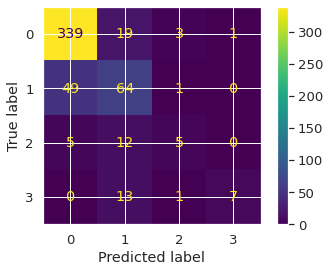

In [ ]:
clf = LogisticRegression(C=0.1,solver='sag',max_iter= 500,random_state=100)
clf.fit(X_train, y_train)
LogisticRegression(C=0.1,solver='sag',max_iter= 500,random_state=100)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_clean)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-0.639157,1.5
1,-0.639157,1.5
2,-0.639157,1.5
3,-0.639157,1.5
4,-0.639157,1.5
...,...,...
1723,0.639157,-1.5
1724,0.639157,-1.5
1725,0.639157,-1.5
1726,0.639157,-1.5


In [ ]:
finalDf = pd.concat([principalDf, df[['evaluate']]], axis = 1)
finalDf

,principal component 1,principal component 2,evaluate
0,-0.639157,1.5,0
1,-0.639157,1.5,0
2,-0.639157,1.5,0
3,-0.639157,1.5,0
4,-0.639157,1.5,0
...,...,...,...
1723,0.639157,-1.5,2
1724,0.639157,-1.5,3
1725,0.639157,-1.5,0
1726,0.639157,-1.5,2


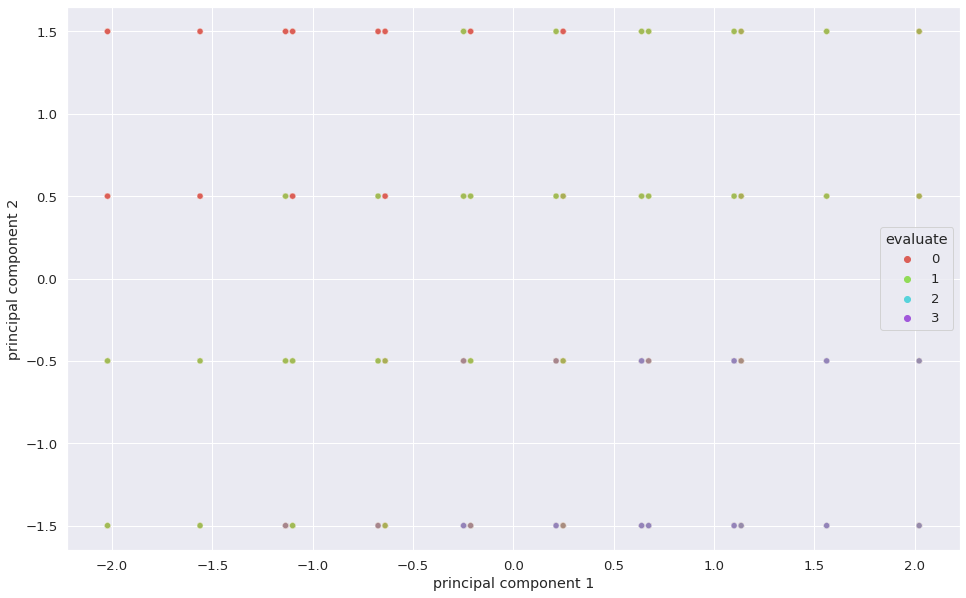

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="evaluate",
    palette=sns.color_palette("hls", 4),
    data=finalDf,
    legend="full",
    alpha=0.3
)